# 2D convolutions

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy import signal
from scipy import linalg
import time

Consider a 2D signal $\mathbf{v}$ representing a picture

(-0.5, 496.5, 371.5, -0.5)

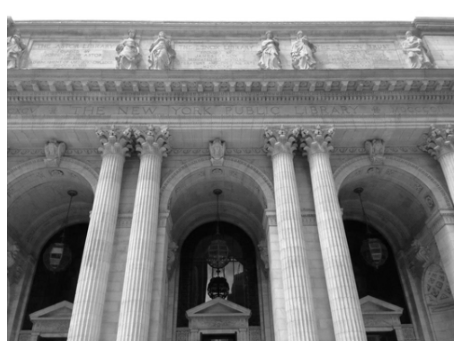

In [33]:
# write here the import path of the image
image_path = '/Users/akselostmoe/Skole/4. klasse høst 2021/maskinlæring/labs/lab3/data/NYlibrary.png'

v = np.mean(imread(image_path), axis = 2)

plt.rcParams['figure.figsize'] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')

Consider the following kernels

In [34]:
kernel_blur1 = np.array([[ 1,  2,  1],
                         [ 2,  4,  2],
                         [ 1,  2,  1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10,10)) / 100

kernel_edge1 = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])
kernel_edge2 = np.array([[ 0, -1,  0],
                         [-1,  4, -1],
                         [ 0, -1,  0]])
kernel_edge3 = np.array([[ 1,  0, -1],
                         [ 0,  0,  0],
                         [-1,  0,  1]])

kernel_sobel_horizontal = np.array([[ 1,  2,  1],
                                    [ 0,  0,  0],
                                    [-1, -2, -1]])
kernel_sobel_vertical = np.array([[ 1,  0, -1],
                                  [ 2,  0, -2],
                                  [ 1,  0, -1]])

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

kernel_drunk = np.random.randn(50,50)

Choose here the desired filter $\mathbf{k}$

In [35]:
k = kernel_drunk

N = len(v)
M = len(k)


In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 3 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Direct definition (sums of products)

Convolution without "boundary layers"

(-0.5, 447.5, 322.5, -0.5)

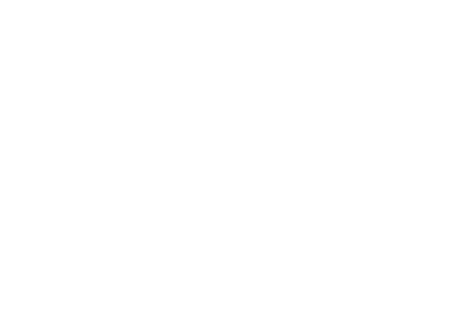

In [36]:
# s_v = size of v
s_v = np.array(np.shape(v))
s_k = np.array(np.shape(k))
s_out = s_v - s_k + 1 # dimensjonene på bildet som blir output

v_conv_1 = np.zeros(s_out)
for i in range(s_out[0]):
    for j in range(s_out[1]):
        v_conv_1[i,j] = np.sum(np.flip(k) * v[i:i+s_k[0], j:j+s_k[1]])

img = plt.imshow(v_conv_1, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')

## 2. Convolution through DFT

Besides the filtered image, plot the DFT of the original image, of the kernel and of the filtered image.

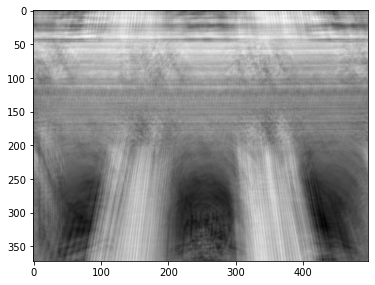

In [37]:
v_hat = np.fft.fft2(v)
k_hat = np.fft.fft2(k, np.shape(v))

vk_hat = v_hat * k_hat
v_conv_2 = np.real(np.fft.ifft2(vk_hat))

fig, axes = plt.subplots(nrows=1, ncols= 1, figsize = (6,6))
axes.imshow(v_conv_2, cmap = "gray")



## 3. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

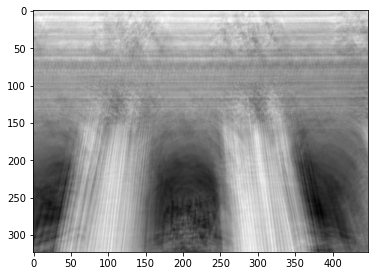

In [38]:
v_conv_3 = signal.convolve(v,k, mode = "valid")

fig, axes = plt.subplots(nrows=1, ncols= 1, figsize = (6,6))
axes.imshow(v_conv_3, cmap = "gray")